In [1]:
### Import packages for preprocessing

import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

from utils.nltk_helpers import nltk2wn_tag, lemmatize_sentence
from utils.nltk_helpers import preprocessor, tagcleaner

### Import packages to create absolute file path & make code independent of operating system

from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")

### Import packages to visualize data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
### Read in dataset

base_path = Path("__file__").parent

full_path = (base_path / "../../data/raw/stackoverflow_raw_finalsample_all.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

In [3]:
stackoverflow.shape

(30000, 16)

In [9]:
stackoverflow.head()

,Unnamed: 0.1.1,question_score,answer_score,question_title,question_text,answer_count,comment_count,creation_date,tags,view_count,answer_text,score_cat_all
0,1556074,1,-1,Displaying based upon if NULL is found in Column,<p>I have a data base that I update on a daily...,1,8,2019-10-24 12:57:07.473000+00:00,php|html|sql,52,<p>Rather than checking for NULL you should be...,bad
1,2286193,-2,-2,Cannot Update Composer in Command Line,<p>I am updating the composer and it shows up ...,2,6,2019-06-21 08:30:56.677000+00:00,php|laravel|composer-php,450,<p>try following command </p>\n\n<p>install fi...,bad
2,1103842,0,-1,How to swap huge string,<p>I have huge string e.g (This is just the pa...,2,2,2019-07-23 06:39:24.553000+00:00,c#,98,<p>here</p>\n\n<pre><code>public static void M...,bad
3,1347753,0,-1,Exception is not being caught,<p>Crashlytics reports that the following line...,3,3,2019-06-27 20:02:42.157000+00:00,ios|swift|nsattributedstring|nsmutableattribut...,131,<p>I guess the crash occurs when you try to co...,bad
4,1392062,-1,-1,Spring Boot - Do a new WebClient call with res...,<p>I'm trying to call an api with 2 call using...,1,1,2019-06-10 14:15:00.307000+00:00,spring-boot|spring-webclient,41,<p>This is the last code:</p>\n\n<pre><code>pu...,bad


In [10]:
### Drop any columns from dataframe not holding useful information

stackoverflow = stackoverflow.drop(columns=['Unnamed: 0.1.1', 'question_id', 'question_id_check'])

KeyError: "['question_id' 'question_id_check'] not found in axis"

In [11]:
### Print out variable types for overview

stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1.1  30000 non-null  int64 
 1   question_score  30000 non-null  int64 
 2   answer_score    30000 non-null  int64 
 3   question_title  30000 non-null  object
 4   question_text   30000 non-null  object
 5   answer_count    30000 non-null  int64 
 6   comment_count   30000 non-null  int64 
 7   creation_date   30000 non-null  object
 8   tags            30000 non-null  object
 9   view_count      30000 non-null  int64 
 10  answer_text     30000 non-null  object
 11  score_cat_all   30000 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.7+ MB


In [8]:
### Figure out how to deal with missing values for answer_text_clean, tags_clean and question_title_clean

stackoverflow.isna().any()

Unnamed: 0.1.1    False
question_score    False
answer_score      False
question_title    False
question_text     False
answer_count      False
comment_count     False
creation_date     False
tags              False
view_count        False
answer_text       False
score_cat_all     False
dtype: bool

In [12]:
stackoverflow.score_cat_all.value_counts()

bad      10000
good     10000
great    10000
Name: score_cat_all, dtype: int64

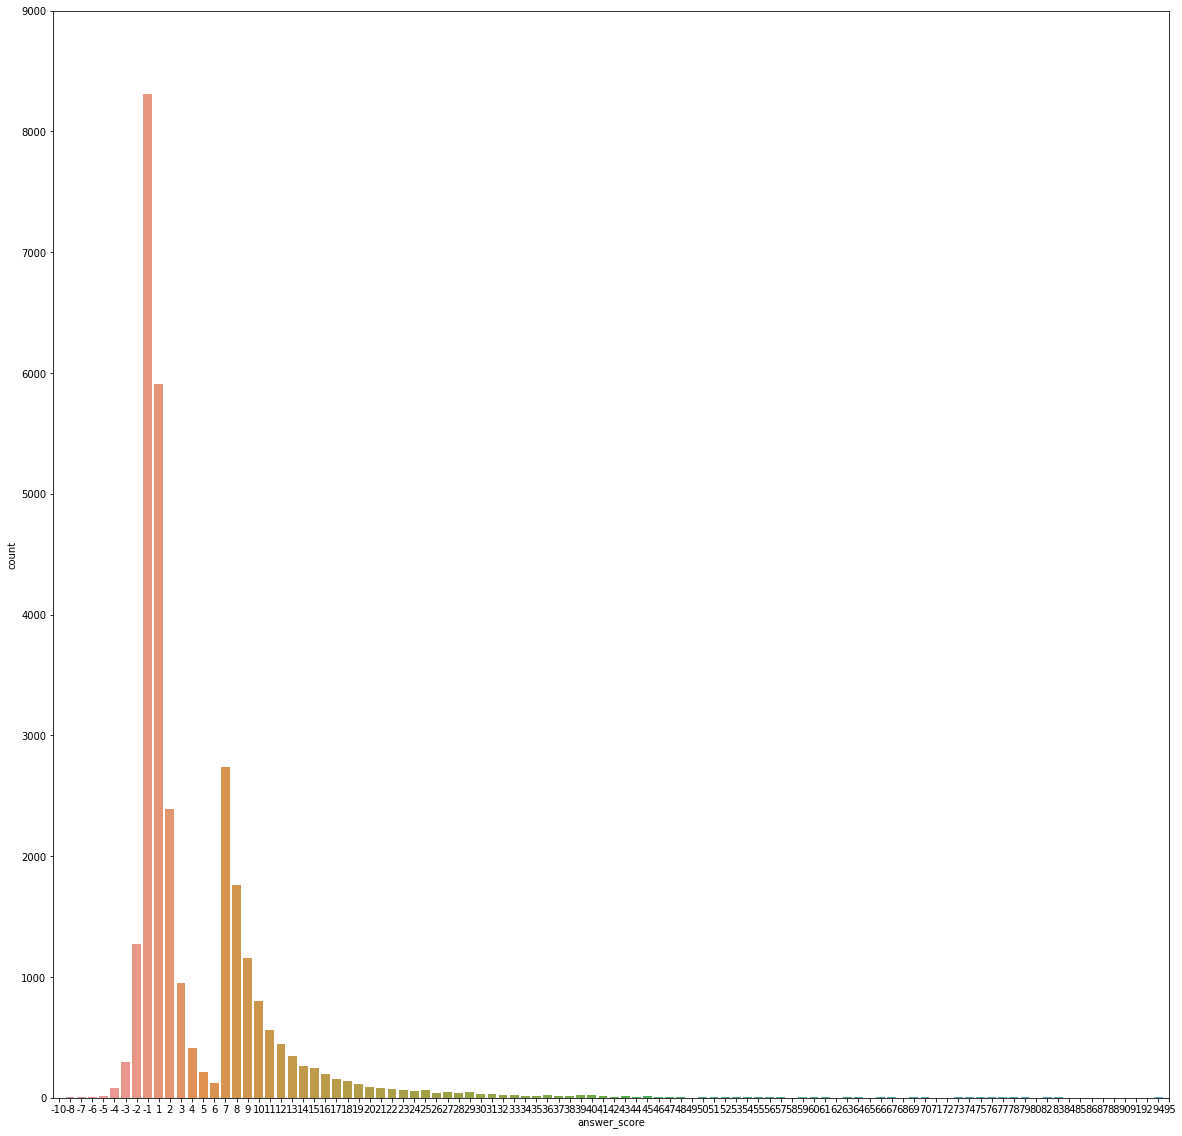

In [68]:
#### Histogram of distribution of outcome column "score"

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='answer_score', data=stackoverflow)
plt.xlim(None, 100) 
plt.ylim(0, 9000) 
plt.show()

In [8]:
### Cleaning the text

stopwords_nltk = nltk.corpus.stopwords.words('english')

In [9]:
print(stopwords_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
### Create own list of stopwords building on nltk

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "can't", "'i'd", "it's", "I've"]

In [11]:
### Prepare lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
###  Define function that takes a whole sentence and outputs the lemmatized sentence

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [13]:
### Defining regex for preprocessing function

bad_symbols_re = re.compile('[^0-9a-z #+_]')
replace_by_space_re = re.compile('[-/(){}\[\]\|,;@=:]')

In [14]:
### Prepare list of punctuations to be excluded in cleaning process

punctuation = ['&', '%', '§', '/', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', '_', '*', '|', ',', '+', '€', '$', '#', '==', '[',']', '{', '}', "`", '´', "´´", '!', '°', '^', '--', "``", "''", '-', '"', "'", "?"]

In [13]:
### Write tailored preprocessing function to remove specific strings, symbols, code-snippets, stopwords and punctuation and to lemmatize words

def preprocessor(text_column):
    ### Split text on capital letters
    text_column = ' '.join(re.findall('[a-zA-Z][^A-Z]*', text_column))
    ### Remove code snippets
    text_column = re.sub(r'<code>.*?</code>', ' ', text_column.lower())
    text_column = re.sub(r'<.*?>', ' ', text_column)
    text_column = re.sub(r'[( )]', ' ', text_column)
    ### Removing dots connecting words and at end of sentence
    text_column = " ".join(text_column.split("."))
    ### Removing backslash connecting words
    text_column = " ".join(text_column.split("\\"))
    ### Replace symbols defined in regex by a space
    text_column = replace_by_space_re.sub(' ', text_column)
    ### Delete symbols defined in regex from text
    text_column = bad_symbols_re.sub('', text_column)
    ### Remove stopwords from sentences
    text_column = [w for w in text_column.split() if w not in stopwords]
    text_column = ' '.join(text_column)
    ### Clean each letter/token in a sentence
    token = [letter for letter in text_column if letter not in punctuation]
    text_column = ''.join(token)
    ### Lemmatize sentences
    text_column = lemmatize_sentence(text_column)
    ### Replace occurrences of single alphabet characters
    text_column = re.sub(r"\b[a-zA-Z]\b", "", text_column)
    ### Remove unnecessary white spaces
    text_column = ' '.join(text_column.split())
    return text_column

example_sentence = "<p> ´´HI myself 3945p0hfnds <p> n, <code> grnkgljhkge </code>I am singing. 'our' (testing)   '  arbitrary & d lkögeaf_fewnefwl& can't c you're again tghghg.words.blub wild@fly\modules\system\\layers |tags|some more tags|blub"

preprocessor(example_sentence)

NameError: name 'replace_by_space_re' is not defined

In [16]:
### Write tailored preprocessing function for tags

def tagcleaner(text_column):
    ### Removing vertical line connecting words
    text_column = text_column.split("|")
    text_column = ' '.join(text_column)
    return text_column


tag_example = "php|laravel|composer-php"

tagcleaner(tag_example)

'php laravel composer-php'

In [18]:
### Separating target and text columns

excluded_cols = ['comment_count', 'creation_date', 'view_count', 'answer_count', 'score_cat_positive', 'question_score', 'answer_score']
target_col = ['score_cat_all']
text_cols = [x for x in stackoverflow if x not in target_col + excluded_cols]

In [22]:
print(text_cols)

['question_title', 'question_text', 'tags', 'answer_text']


In [19]:
### Applying cleaning / preprocessing to all text columns

for var_name in text_cols:
    new_var = "%s_%s" % (var_name, "clean")
    stackoverflow[new_var] = stackoverflow[var_name].apply(preprocessor)

In [20]:
### Applying tag cleaner function to tags column

stackoverflow['tag_list_clean'] = stackoverflow['tags'].apply(tagcleaner)

In [21]:
pd.set_option('display.max_colwidth', -1)

In [22]:
stackoverflow.head(20)

ole log collector create collector collect gt console log reply collect content strng console log success send successfully verified message channel type dm return message member add role catch err gt console log err var success embed new discord rich embed set title verification successful add field user message author true add field string strng true set footer goriko bot set color xff set timestamp message guild channel get send success embed catch err gt console log err else var fail embed new discord rich embed set title verification fail add field user message author true add field correct token strng true add field token give content true set color xff set footer goriko bot set timestamp message guild channel get send fail embed catch err gt console log err reply invalid token please try                                                                                                                                                                                                                                             
8   function definition execute function body get execute function call call function use function name follow parenthesis def myfunction print hello function myfunction                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
9   way work kerndog suggest thank much poblem would solve include lt cmathgt include lt iomanipgt include lt iostreamgt constexpr int prec std numericlimitslt doublegt digit int main const double test std pow const float test std pow std cout lt lt double lt lt std setprecision prec lt lt std fix lt lt test lt lt std cout lt lt float lt lt std setprecision prec lt lt std fix lt lt test lt lt output double exactly output float                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
10  give fa

In [23]:
### Check again for missing values

stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   question_score        30000 non-null  int64 
 1   answer_score          30000 non-null  int64 
 2   question_title        30000 non-null  object
 3   question_text         30000 non-null  object
 4   answer_count          30000 non-null  int64 
 5   comment_count         30000 non-null  int64 
 6   creation_date         30000 non-null  object
 7   tags                  30000 non-null  object
 8   view_count            30000 non-null  int64 
 9   answer_text           30000 non-null  object
 10  score_cat_all         30000 non-null  object
 11  score_cat_positive    20000 non-null  object
 12  question_title_clean  30000 non-null  object
 13  question_text_clean   30000 non-null  object
 14  tags_clean            30000 non-null  object
 15  answer_text_clean     30000 non-null

In [24]:
# Make categorical score labels numeric

stackoverflow['score_cat_all'] = stackoverflow['score_cat_all'].astype('category')
stackoverflow['score_cat_all'] = stackoverflow.score_cat_all.cat.codes

In [25]:
### Save preprocessed data to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../../data/processed/stackoverflow_preprocessed_all.csv").resolve()
stackoverflow.to_csv(os.path.join(full_path))